In [1]:
from environments import ZeroDCleanupEnv
import numpy as np
import torch
from agents import UAgent
from tqdm import tqdm

2023-11-29 00:45:15,206	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"cuda available: {torch.cuda.is_available()}")
np.set_printoptions(threshold=np.inf)

cuda available: False


In [3]:
num_agents = 10
reward_multiplier = 10

# for printing options
pp = False
verbose = False
verbose_episode = 200  # start printing at which epoch

In [4]:
thresholdDepletion = 0.4
thresholdRestoration = 0.0
wasteSpawnProbability = 0.5
appleRespawnProbability = 0.05
dirt_multiplier = 10
division_ep = 1e-7

In [5]:
gamma = 0.999
epsilon = 1.0
epsilon_decay = 0.99995
epsilon_min = 0.1
lr = 0.0001
batch_size = 8

In [6]:
num_agents = 10
agent_ids = [str(i) for i in range(num_agents)]

In [7]:
state_dim = 4
action_dim = 2

In [8]:
env = ZeroDCleanupEnv(agent_ids=agent_ids, 
                      num_agents=num_agents, 
                      thresholdDepletion=thresholdDepletion,
                        thresholdRestoration=thresholdRestoration,
                        wasteSpawnProbability=wasteSpawnProbability,
                        appleRespawnProbability=appleRespawnProbability,
                        dirt_multiplier=dirt_multiplier,
                        area=150)

agentCoordinator = UAgent(device=device,
                          num_action_outputs=num_agents,
                          action_size=action_dim,
                          buffer_size=4000,
                          batch_size=batch_size,
                          lr=lr,
                          gamma=gamma,
                          epsilon=epsilon,
                          epsilon_decay=epsilon_decay,
                          epsilon_min=epsilon_min,
                          u_layers=[
                              (state_dim, 256),
                              (256, 128),
                              (128, 64),
                              (64, 1)
                          ])

In [9]:
ending_ep_rewards = []
num_episodes = 200
num_steps_per_epsiode = 1000

In [10]:
max_reward = 0
for episode in range(num_episodes):
    print(f"========= Episode {episode} =========")

    states, info = env.reset()
    #states = np.concatenate(list(states.values()), axis=0)
    state = states[agent_ids[0]]
    #num_apples, num_dirt, _, _ = state
    #state = np.array([num_apples, num_dirt])

    print(f"info: {info}")

    for step in tqdm(range(num_steps_per_epsiode)):
        actions_list = agentCoordinator.act(env)[0]
        actions = {agent_id: actions_list[i] for i, agent_id in enumerate(agent_ids)}
        next_states, reward, dones, _, info = env.step(actions)
        #next_states = np.concatenate(list(next_states.values()), axis=0)
        next_state = next_states[agent_ids[0]]
        #num_apples, num_dirt, _, _ = next_state
        #next_state = np.array([num_apples, num_dirt])
        #reward_graph.append(reward)
        agentCoordinator.step(state, reward, next_state)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        state = next_state

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    

    print(f"ending reward: {ending_reward}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Episode {episode} =========")

    ending_ep_rewards.append(ending_reward)

    agentCoordinator.scheduler.step()

    # if ending_ep_rewards[-1] > 2700 and agentCoordinator.epsilon < 0.1 and ending_ep_rewards[-1] > max_reward:
    #     break

    if ending_reward > max_reward:
        max_reward = ending_reward

    

#torch.save(agentCoordinator.q_network.state_dict(), "results/q_simple_" + str(test_id) + "/q_network.pt")

        

========= Episode 0 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


  4%|▍         | 45/1000 [00:00<00:02, 449.72it/s]

100%|█████████▉| 999/1000 [00:01<00:00, 573.12it/s] 


ending reward: 2613.3232006599483
========= End of Episode 0 =========
========= Episode 1 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1066.53it/s]


ending reward: 2613.820067819557
========= End of Episode 1 =========
========= Episode 2 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 692.76it/s] 


ending reward: 2554.523539428866
========= End of Episode 2 =========
========= Episode 3 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1199.47it/s]


ending reward: 2547.0703895097613
========= End of Episode 3 =========
========= Episode 4 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1203.61it/s]


ending reward: 2412.3307788767743
========= End of Episode 4 =========
========= Episode 5 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1233.28it/s]


ending reward: 2496.5846469483563
========= End of Episode 5 =========
========= Episode 6 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1162.52it/s]


ending reward: 2397.213632651052
========= End of Episode 6 =========
========= Episode 7 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1240.71it/s]


ending reward: 2643.8731570722016
========= End of Episode 7 =========
========= Episode 8 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1054.57it/s]


ending reward: 2581.335971108786
========= End of Episode 8 =========
========= Episode 9 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1035.50it/s]


ending reward: 2141.556595160986
========= End of Episode 9 =========
========= Episode 10 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1211.89it/s]


ending reward: 2171.7028335926707
========= End of Episode 10 =========
========= Episode 11 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1133.02it/s]


ending reward: 2598.114019701382
========= End of Episode 11 =========
========= Episode 12 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1266.13it/s]


ending reward: 2566.116894282652
========= End of Episode 12 =========
========= Episode 13 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1181.30it/s]


ending reward: 2408.258926189243
========= End of Episode 13 =========
========= Episode 14 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1225.69it/s]


ending reward: 2263.2346079234508
========= End of Episode 14 =========
========= Episode 15 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1217.64it/s]


ending reward: 2269.0851831421805
========= End of Episode 15 =========
========= Episode 16 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1236.07it/s]


ending reward: 2553.5956715672933
========= End of Episode 16 =========
========= Episode 17 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1161.05it/s]


ending reward: 2408.1434738193593
========= End of Episode 17 =========
========= Episode 18 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1218.41it/s]


ending reward: 2311.518433080075
========= End of Episode 18 =========
========= Episode 19 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1206.05it/s]


ending reward: 2200.377022258648
========= End of Episode 19 =========
========= Episode 20 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1030.86it/s]


ending reward: 2293.2078711989857
========= End of Episode 20 =========
========= Episode 21 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1065.32it/s]


ending reward: 2120.861733172483
========= End of Episode 21 =========
========= Episode 22 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1032.07it/s]


ending reward: 2194.8566859518614
========= End of Episode 22 =========
========= Episode 23 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1044.14it/s]


ending reward: 2171.447733120354
========= End of Episode 23 =========
========= Episode 24 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1129.23it/s]


ending reward: 2305.441445554202
========= End of Episode 24 =========
========= Episode 25 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1097.89it/s]


ending reward: 1972.9314537381213
========= End of Episode 25 =========
========= Episode 26 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1034.24it/s]


ending reward: 1495.0473159573726
========= End of Episode 26 =========
========= Episode 27 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1078.48it/s]


ending reward: 2333.4250443039414
========= End of Episode 27 =========
========= Episode 28 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1067.41it/s]


ending reward: 2049.503006444098
========= End of Episode 28 =========
========= Episode 29 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1042.91it/s]


ending reward: 2200.0052716014256
========= End of Episode 29 =========
========= Episode 30 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 977.98it/s] 


ending reward: 2077.867581698296
========= End of Episode 30 =========
========= Episode 31 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 660.07it/s]


ending reward: 2257.9783015523885
========= End of Episode 31 =========
========= Episode 32 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 859.85it/s] 


ending reward: 2136.8109596946524
========= End of Episode 32 =========
========= Episode 33 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 927.48it/s]


ending reward: 1927.7803763688423
========= End of Episode 33 =========
========= Episode 34 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 959.92it/s] 


ending reward: 2082.0657667809
========= End of Episode 34 =========
========= Episode 35 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 925.30it/s]


ending reward: 1874.1679007493735
========= End of Episode 35 =========
========= Episode 36 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 854.60it/s]


ending reward: 2513.6332490374925
========= End of Episode 36 =========
========= Episode 37 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 947.46it/s] 


ending reward: 2548.4796423537064
========= End of Episode 37 =========
========= Episode 38 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 863.72it/s] 


ending reward: 2344.9071352112337
========= End of Episode 38 =========
========= Episode 39 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 891.35it/s]


ending reward: 2373.2759919159753
========= End of Episode 39 =========
========= Episode 40 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 772.94it/s] 


ending reward: 2317.5231022733174
========= End of Episode 40 =========
========= Episode 41 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 931.81it/s] 


ending reward: 2541.55821032433
========= End of Episode 41 =========
========= Episode 42 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 999.70it/s] 


ending reward: 2422.2971213855844
========= End of Episode 42 =========
========= Episode 43 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 952.59it/s] 


ending reward: 2441.7163462878275
========= End of Episode 43 =========
========= Episode 44 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 970.45it/s] 


ending reward: 2409.6646921140323
========= End of Episode 44 =========
========= Episode 45 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 952.48it/s] 


ending reward: 2578.486717930247
========= End of Episode 45 =========
========= Episode 46 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1008.41it/s]


ending reward: 2542.984407211113
========= End of Episode 46 =========
========= Episode 47 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 839.91it/s]


ending reward: 2648.1188602746224
========= End of Episode 47 =========
========= Episode 48 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 726.60it/s]


ending reward: 2365.6628680651843
========= End of Episode 48 =========
========= Episode 49 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 940.62it/s]


ending reward: 2616.369185506807
========= End of Episode 49 =========
========= Episode 50 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 970.44it/s] 


ending reward: 2060.1347024323045
========= End of Episode 50 =========
========= Episode 51 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 971.49it/s] 


ending reward: 2635.9559154748927
========= End of Episode 51 =========
========= Episode 52 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 973.63it/s] 


ending reward: 2420.5319686888406
========= End of Episode 52 =========
========= Episode 53 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 967.86it/s] 


ending reward: 2563.1069453781315
========= End of Episode 53 =========
========= Episode 54 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1036.28it/s]


ending reward: 2546.5472086395066
========= End of Episode 54 =========
========= Episode 55 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 953.30it/s] 


ending reward: 2694.4324018146704
========= End of Episode 55 =========
========= Episode 56 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 923.28it/s] 


ending reward: 2716.6505112333825
========= End of Episode 56 =========
========= Episode 57 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 806.77it/s] 


ending reward: 2689.1263334372493
========= End of Episode 57 =========
========= Episode 58 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 941.75it/s] 


ending reward: 2460.1095734451146
========= End of Episode 58 =========
========= Episode 59 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1031.01it/s]


ending reward: 2652.8356486196944
========= End of Episode 59 =========
========= Episode 60 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 909.12it/s] 


ending reward: 2655.363668765854
========= End of Episode 60 =========
========= Episode 61 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 842.98it/s]


ending reward: 2689.2829374085204
========= End of Episode 61 =========
========= Episode 62 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 837.21it/s]


ending reward: 2668.253348753396
========= End of Episode 62 =========
========= Episode 63 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 881.10it/s]


ending reward: 2702.0018818280255
========= End of Episode 63 =========
========= Episode 64 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 998.52it/s] 


ending reward: 2730.5878273413614
========= End of Episode 64 =========
========= Episode 65 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 906.49it/s] 


ending reward: 2681.7721346135077
========= End of Episode 65 =========
========= Episode 66 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 958.42it/s] 


ending reward: 2689.0828244618115
========= End of Episode 66 =========
========= Episode 67 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1033.73it/s]


ending reward: 2618.7817460232286
========= End of Episode 67 =========
========= Episode 68 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 915.15it/s]


ending reward: 2700.0753226345973
========= End of Episode 68 =========
========= Episode 69 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 922.46it/s] 


ending reward: 2659.9142214340345
========= End of Episode 69 =========
========= Episode 70 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 923.40it/s] 


ending reward: 2693.854010386603
========= End of Episode 70 =========
========= Episode 71 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 912.85it/s]


ending reward: 2552.442092760133
========= End of Episode 71 =========
========= Episode 72 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 838.35it/s]


ending reward: 2378.7879748340615
========= End of Episode 72 =========
========= Episode 73 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 883.98it/s] 


ending reward: 2715.123995763773
========= End of Episode 73 =========
========= Episode 74 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 905.69it/s]


ending reward: 2731.346503180495
========= End of Episode 74 =========
========= Episode 75 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 882.27it/s]


ending reward: 2701.43588110889
========= End of Episode 75 =========
========= Episode 76 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 914.87it/s]


ending reward: 2709.8438203200326
========= End of Episode 76 =========
========= Episode 77 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 945.43it/s] 


ending reward: 2738.507068227199
========= End of Episode 77 =========
========= Episode 78 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 975.52it/s] 


ending reward: 2441.482438559579
========= End of Episode 78 =========
========= Episode 79 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1013.06it/s]


ending reward: 2509.462772140224
========= End of Episode 79 =========
========= Episode 80 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 964.33it/s] 


ending reward: 2672.99636100679
========= End of Episode 80 =========
========= Episode 81 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 941.55it/s] 


ending reward: 2717.226210383293
========= End of Episode 81 =========
========= Episode 82 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 1013.53it/s]


ending reward: 2745.865888463733
========= End of Episode 82 =========
========= Episode 83 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 903.21it/s]


ending reward: 2736.0549488235265
========= End of Episode 83 =========
========= Episode 84 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 897.76it/s]


ending reward: 2741.922833647625
========= End of Episode 84 =========
========= Episode 85 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 791.82it/s]


ending reward: 2550.570915581892
========= End of Episode 85 =========
========= Episode 86 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 791.44it/s]


ending reward: 2491.0045805635787
========= End of Episode 86 =========
========= Episode 87 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 991.59it/s] 


ending reward: 2600.7634752117283
========= End of Episode 87 =========
========= Episode 88 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 959.79it/s] 


ending reward: 2748.59554850573
========= End of Episode 88 =========
========= Episode 89 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 925.62it/s]


ending reward: 2653.092204819146
========= End of Episode 89 =========
========= Episode 90 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 962.75it/s] 


ending reward: 2766.239973775677
========= End of Episode 90 =========
========= Episode 91 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 923.78it/s]


ending reward: 2559.9718638664626
========= End of Episode 91 =========
========= Episode 92 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 943.33it/s] 


ending reward: 2720.9858979149044
========= End of Episode 92 =========
========= Episode 93 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 952.25it/s] 


ending reward: 2685.4862168635877
========= End of Episode 93 =========
========= Episode 94 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 969.86it/s] 


ending reward: 2742.6199805211263
========= End of Episode 94 =========
========= Episode 95 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 964.91it/s] 


ending reward: 2638.049884785784
========= End of Episode 95 =========
========= Episode 96 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 861.01it/s]


ending reward: 2725.7787153931245
========= End of Episode 96 =========
========= Episode 97 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 958.68it/s] 


ending reward: 2718.5256913630387
========= End of Episode 97 =========
========= Episode 98 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 963.98it/s] 


ending reward: 2661.6401366961363
========= End of Episode 98 =========
========= Episode 99 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 826.30it/s]


ending reward: 2760.81201977809
========= End of Episode 99 =========
========= Episode 100 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 959.17it/s] 


ending reward: 2717.826556333061
========= End of Episode 100 =========
========= Episode 101 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 976.47it/s] 


ending reward: 2274.2262083828377
========= End of Episode 101 =========
========= Episode 102 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 964.49it/s] 


ending reward: 2670.892680743092
========= End of Episode 102 =========
========= Episode 103 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 872.21it/s]


ending reward: 2764.2794979409455
========= End of Episode 103 =========
========= Episode 104 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 650.77it/s]


ending reward: 2727.1320988197826
========= End of Episode 104 =========
========= Episode 105 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 855.68it/s]


ending reward: 2763.5214022436344
========= End of Episode 105 =========
========= Episode 106 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:01<00:00, 967.68it/s] 


ending reward: 2691.737686615249
========= End of Episode 106 =========
========= Episode 107 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


  6%|▌         | 57/1000 [00:00<00:01, 880.13it/s]


KeyboardInterrupt: 

In [11]:
agentCoordinator.epsilon

0.004733767760059576

In [12]:
import matplotlib.pyplot as plt

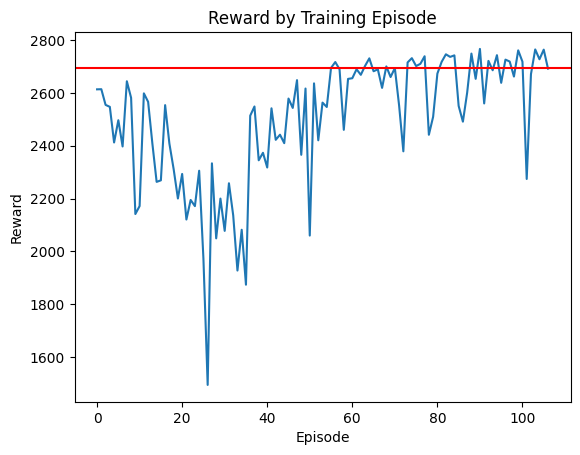

In [13]:
plt.title("Reward by Training Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(ending_ep_rewards)
plt.axhline(y=2695.57, color='r', linestyle='-')
plt.show()

In [14]:
test_stats = []
num_test_episodes = 15
print("========= Testing =========")

for episode in range(num_test_episodes):
    test_stats.append({
        "num_apples": [],
        "num_dirt": [],
        "pickers": [],
        "cleaners": [],
        "total_reward": 0,
    })

    states, info = env.reset()
    test_stats[-1]["num_apples"].append(info["apple"])
    test_stats[-1]["num_dirt"].append(info["dirt"])
    test_stats[-1]["pickers"].append(info["picker"])
    test_stats[-1]["cleaners"].append(info["cleaner"])

    #states = np.concatenate(list(states.values()), axis=0)
    state = states[agent_ids[0]]

    print(f"info: {info}")

    for step in tqdm(range(num_steps_per_epsiode)):
        actions_list = agentCoordinator.act(env)[0]
        actions = {agent_id: actions_list[i] for i, agent_id in enumerate(agent_ids)}
        next_states, reward, dones, _, info = env.step(actions)
        test_stats[-1]["num_apples"].append(info["apple"])
        test_stats[-1]["num_dirt"].append(info["dirt"])
        test_stats[-1]["pickers"].append(info["picker"])
        test_stats[-1]["cleaners"].append(info["cleaner"])
        #next_states = np.concatenate(list(next_states.values()), axis=0)
        next_state = next_states[agent_ids[0]]
        #reward_graph.append(reward)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        state = next_state

        if dones["__all__"]:
            break 

    print(f"ending info: {info}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Test =========")

    test_reward = info["total_apple_consumed"]

    test_stats[-1]["total_reward"] = test_reward

    print(test_reward)

========= Testing =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6388.66it/s]


ending info: {'total_apple_consumed': 110.84206127209993, 'step_apple_consumed': 0.0618239854898651, 'apple': 0.8655357968581114, 'dirt': 60.43828703676267, 'picker': 10, 'cleaner': 0}
========= End of Test =========
110.84206127209993
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 5472.35it/s]


ending info: {'total_apple_consumed': 586.3790928727303, 'step_apple_consumed': 2.0982806301408803, 'apple': 31.006751302899367, 'dirt': 44.32655390816154, 'picker': 10, 'cleaner': 0}
========= End of Test =========
586.3790928727303
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6166.78it/s]


ending info: {'total_apple_consumed': 1230.5484629649973, 'step_apple_consumed': 3.1320463497980713, 'apple': 46.25792550645372, 'dirt': 33.48007540993583, 'picker': 10, 'cleaner': 0}
========= End of Test =========
1230.5484629649973
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6184.31it/s]


ending info: {'total_apple_consumed': 663.5646951010084, 'step_apple_consumed': 0.0, 'apple': 32.92880364748432, 'dirt': 41.67229542743576, 'picker': 0, 'cleaner': 10}
========= End of Test =========
663.5646951010084
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6727.23it/s]


ending info: {'total_apple_consumed': 89.08207196209595, 'step_apple_consumed': 0.041515207116815916, 'apple': 0.5812128996354229, 'dirt': 60.112644550715146, 'picker': 10, 'cleaner': 0}
========= End of Test =========
89.08207196209595
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6623.09it/s]


ending info: {'total_apple_consumed': 98.5386299563298, 'step_apple_consumed': 0.20108920907025943, 'apple': 10.815987088256785, 'dirt': 52.30752473349726, 'picker': 3, 'cleaner': 7}
========= End of Test =========
98.5386299563298
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 5031.78it/s]


ending info: {'total_apple_consumed': 1120.0992815440106, 'step_apple_consumed': 2.089965191360531, 'apple': 30.91462233536084, 'dirt': 44.08568935887531, 'picker': 10, 'cleaner': 0}
========= End of Test =========
1120.0992815440106
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6684.59it/s]


ending info: {'total_apple_consumed': 1590.7244551162603, 'step_apple_consumed': 3.133706161400952, 'apple': 46.281610509945025, 'dirt': 33.47505513646689, 'picker': 10, 'cleaner': 0}
========= End of Test =========
1590.7244551162603
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6331.12it/s]


ending info: {'total_apple_consumed': 2112.2622211602516, 'step_apple_consumed': 2.8106542435175585, 'apple': 46.43000297477029, 'dirt': 33.37071894722398, 'picker': 9, 'cleaner': 1}
========= End of Test =========
2112.2622211602516
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6236.70it/s]


ending info: {'total_apple_consumed': 835.6061562575665, 'step_apple_consumed': 2.21892564620879, 'apple': 32.878598248856015, 'dirt': 42.21120132504589, 'picker': 10, 'cleaner': 0}
========= End of Test =========
835.6061562575665
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6655.08it/s]


ending info: {'total_apple_consumed': 956.5995551958856, 'step_apple_consumed': 3.228501904647589, 'apple': 47.64969652968304, 'dirt': 32.492344404379416, 'picker': 10, 'cleaner': 0}
========= End of Test =========
956.5995551958856
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6879.32it/s]


ending info: {'total_apple_consumed': 401.32568135812005, 'step_apple_consumed': 3.1432323910532736, 'apple': 46.40137652174073, 'dirt': 33.37407871326531, 'picker': 10, 'cleaner': 0}
========= End of Test =========
401.32568135812005
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 5249.38it/s]


ending info: {'total_apple_consumed': 1562.0566343023618, 'step_apple_consumed': 2.811326012586796, 'apple': 46.442025549584095, 'dirt': 33.35375827481931, 'picker': 9, 'cleaner': 1}
========= End of Test =========
1562.0566343023618
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6142.36it/s]


ending info: {'total_apple_consumed': 247.28808066127684, 'step_apple_consumed': 1.6131405591928647, 'apple': 24.287976955763504, 'dirt': 44.52491443378065, 'picker': 10, 'cleaner': 0}
========= End of Test =========
247.28808066127684
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 0}


100%|█████████▉| 999/1000 [00:00<00:00, 6294.98it/s]

ending info: {'total_apple_consumed': 93.97597312017837, 'step_apple_consumed': 0.6753465356752745, 'apple': 9.942906619072803, 'dirt': 56.34633940749822, 'picker': 10, 'cleaner': 0}
========= End of Test =========
93.97597312017837


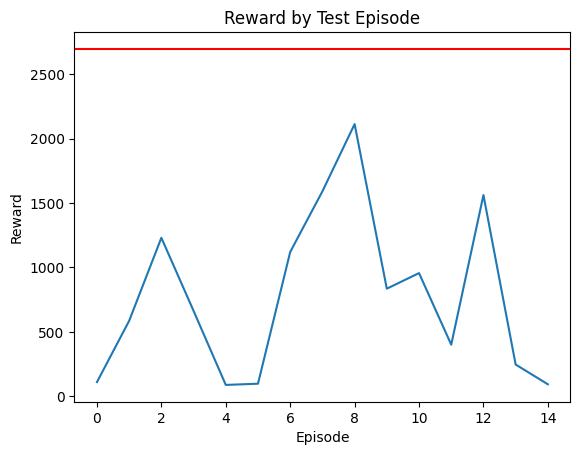

average reward 779.9262035230115


In [15]:
plt.figure()
plt.title("Reward by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot([stat['total_reward'] for stat in test_stats])
plt.axhline(y=2695.57, color='r', linestyle='-')
plt.show()
print('average reward', np.mean([stat['total_reward'] for stat in test_stats]))

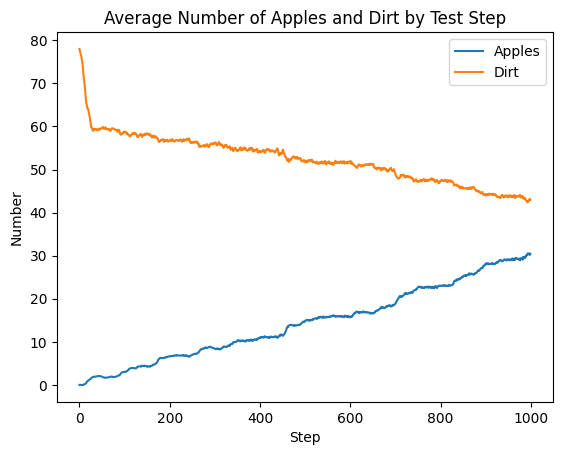

In [16]:
plt.figure()
plt.title("Average Number of Apples and Dirt by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_apples = []
avg_num_dirt = []
for i in range(num_steps_per_epsiode):
    avg_num_apples.append(np.mean([stat['num_apples'][i] for stat in test_stats]))
    avg_num_dirt.append(np.mean([stat['num_dirt'][i] for stat in test_stats]))
plt.plot(avg_num_apples, label="Apples")
plt.plot(avg_num_dirt, label="Dirt")
plt.legend()
plt.show()

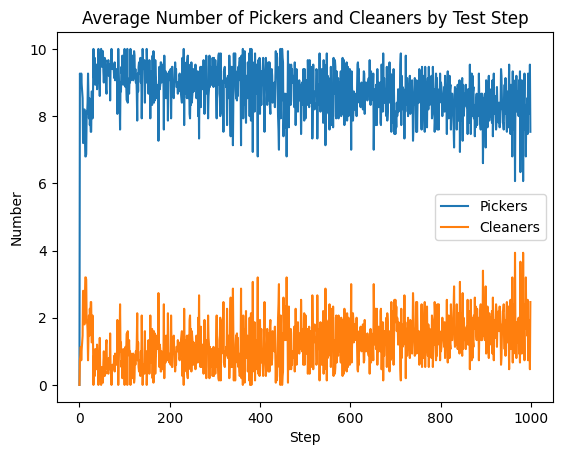

In [17]:
plt.figure()
plt.title("Average Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_pickers = []
avg_num_cleaners = []
for i in range(num_steps_per_epsiode):
    avg_num_pickers.append(np.mean([stat['pickers'][i] for stat in test_stats]))
    avg_num_cleaners.append(np.mean([stat['cleaners'][i] for stat in test_stats]))
plt.plot(avg_num_pickers, label="Pickers")
plt.plot(avg_num_cleaners, label="Cleaners")
plt.legend()
plt.show()

average number of pickers 9.294705294705295
average number of cleaners 0.6953046953046953


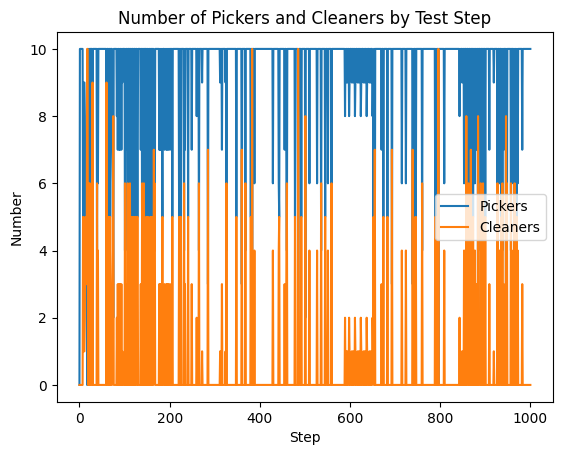

In [18]:
plt.figure()
plt.title("Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
episode = test_stats[0]
plt.plot(episode['pickers'], label="Pickers")
plt.plot(episode['cleaners'], label="Cleaners")
print('average number of pickers', np.mean(episode['pickers']))
print('average number of cleaners', np.mean(episode['cleaners']))
plt.legend()
plt.show()

average picker cleaner ratio 2.608922558922559
average apple dirt ratio 0.030607015565538225


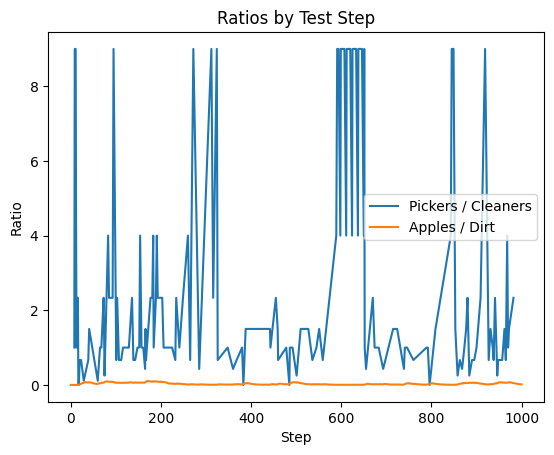

In [19]:
plt.figure()
plt.title("Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
episode = test_stats[0]
#plt.plot([episode['pickers'][i] / (episode['cleaners'][i] + 1e-1) for i in range(len(episode['pickers']))])

picker_cleaner_ratios = []
picker_cleaner_steps = []
for i, (num_pickers, num_cleaners) in enumerate(zip(episode['pickers'], episode['cleaners'])):
    if num_cleaners > 0:
        picker_cleaner_ratios.append(num_pickers / num_cleaners)
        picker_cleaner_steps.append(i)
print('average picker cleaner ratio', np.mean(picker_cleaner_ratios))
plt.plot(picker_cleaner_steps, picker_cleaner_ratios, label='Pickers / Cleaners')

apple_dirt_ratios = []
apple_dirt_steps = []
for i, (num_apples, num_dirt) in enumerate(zip(episode['num_apples'], episode['num_dirt'])):
    if num_dirt > 0:
        apple_dirt_ratios.append(num_apples / num_dirt)
        apple_dirt_steps.append(i)
plt.plot(apple_dirt_steps, apple_dirt_ratios, label='Apples / Dirt')
print('average apple dirt ratio', np.mean(apple_dirt_ratios))
plt.legend()
plt.show()

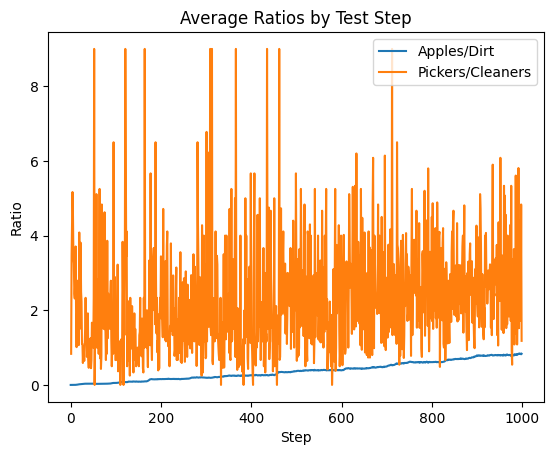

In [20]:
plt.figure()
plt.title("Average Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
avg_apple_dirt_ratios = []
apple_dirt_steps = []
avg_picker_cleaner_ratios = []
picker_cleaner_steps = []
for i in range(num_steps_per_epsiode):
    #avg_apple_dirt_ratios.append(np.mean([stat['num_apples'][i] / (stat['num_dirt'][i] + 1e-8) for stat in test_stats]))
    #avg_picker_cleaner_ratios.append(np.mean([stat['pickers'][i] / (stat['cleaners'][i]) for stat in test_stats if stat['cleaners'][i] > 0]))
    apple_dirt = []
    picker_cleaner = []
    for stat in test_stats:
        if stat['num_dirt'][i] > 0:
            apple_dirt.append(stat['num_apples'][i] / stat['num_dirt'][i])
        if stat['cleaners'][i] > 0:
            picker_cleaner.append(stat['pickers'][i] / stat['cleaners'][i])
    if len(apple_dirt) > 0:
        avg_apple_dirt_ratios.append(np.mean(apple_dirt))
        apple_dirt_steps.append(i)
    if len(picker_cleaner) > 0:
        avg_picker_cleaner_ratios.append(np.mean(picker_cleaner))
        picker_cleaner_steps.append(i)

plt.plot(apple_dirt_steps, avg_apple_dirt_ratios, label="Apples/Dirt")
plt.plot(picker_cleaner_steps, avg_picker_cleaner_ratios, label="Pickers/Cleaners")
plt.legend()
plt.show()